In [5]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#load data
df = pd.read_csv(r'F:\[Kaggle] Santander\train.csv')

In [4]:
#all float, except target (0/1)
#df.dtypes
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
#preparing train and test set
del df['ID_code']
df_target = df['target']
del df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.15, random_state=42)
print(X_train.shape,' - ',y_train.shape)

(170000, 200)  -  (170000,)


In [81]:
#getting PC 
X = X_train.values
X = scale(X)
pca = PCA(n_components=99)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

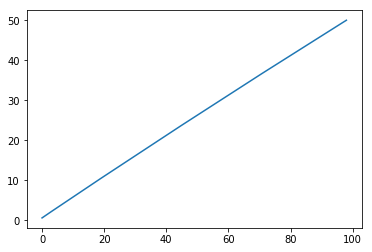

In [82]:
len(pca.explained_variance_ratio_) #
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [83]:
pca.transform(X).shape

(170000, 99)

In [84]:
pca.components_[0,].shape
X = X_test.values
X = scale(X)
pca.transform(X).shape
#now we can train a model on these 99 compunents instead of the original 200 features

(30000, 99)

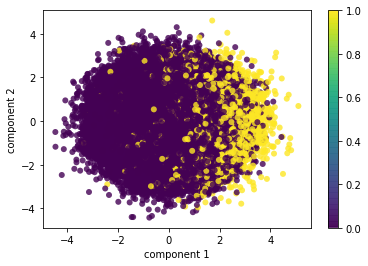

In [38]:
pca_2 = PCA(n_components=2)
projected = pca_2.fit_transform(X)
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.8
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [73]:
#another example with fake data
rng = np.random.RandomState(5)
df_newX = pd.DataFrame(rng.randn(3, 2000).T, columns= ['rand1','rand2','rand3'])
df_newX['feature1'] = df_newX['rand3']*2
df_newX['feature2'] = df_newX['rand3']*df_newX['rand2']
df_newX['feature3'] = 1
df_newX['feature4'] = df_newX['rand3']*10
df_newX.head()

,rand1,rand2,rand3,feature1,feature2,feature3,feature4
0,0.441227,0.373396,-1.548223,-3.096446,-0.578100,1,-15.482229
1,-0.330870,2.300405,0.228437,0.456874,0.525498,1,2.284372
2,2.430771,-2.061890,-0.455654,-0.911308,0.939508,1,-4.556540
3,-0.252092,0.290928,-0.286088,-0.572176,-0.083231,1,-2.860879
4,0.109610,0.115478,0.610811,1.221621,0.070535,1,6.108107


In [74]:
pca_7 = PCA(n_components=7)
pca_7.fit(scale(df_newX.values))
pca_7.components_

array([[ 2.90444602e-03,  5.75423306e-03,  5.77337836e-01,
         5.77337836e-01, -1.23441342e-03, -0.00000000e+00,
         5.77337836e-01],
       [-6.50492389e-01, -2.41075568e-01,  2.40505119e-03,
         2.40505119e-03,  7.20225568e-01, -0.00000000e+00,
         2.40505119e-03],
       [-4.17733427e-01,  9.05528470e-01, -2.36077047e-03,
        -2.36077047e-03, -7.41636987e-02,  0.00000000e+00,
        -2.36077047e-03],
       [ 6.34310649e-01,  3.49095474e-01, -1.73188299e-03,
        -1.73188299e-03,  6.89763259e-01, -0.00000000e+00,
        -1.73188299e-03],
       [ 1.37056300e-18,  3.51371397e-17, -7.41577562e-01,
         7.49052910e-02, -4.74693971e-18, -0.00000000e+00,
         6.66672271e-01],
       [-4.43779154e-18, -9.84535258e-17, -3.41656825e-01,
         8.13053420e-01, -7.80517051e-17, -0.00000000e+00,
        -4.71396595e-01],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -1.00000000e+00,
        -0.0000000